In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation

c:\users\jk\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\jk\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\jk\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\jk\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [9]:
import keras.backend as K
def swish(x, beta=1.0):
    return x * K.sigmoid(beta * x)
def custom(x,beta=2,alpha=0.5,gamma=20):
    return (K.sigmoid(x)*beta*x-K.abs(x)/gamma)*alpha
   
from keras.utils.generic_utils import get_custom_objects

get_custom_objects().update({'swish': Activation(swish)})
get_custom_objects().update({'custom': Activation(custom)})

In [4]:
def make_model(activation='relu'):
    
    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation=activation, padding='same'))
    model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation=activation, padding='same'))
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding='same'))
    model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding='same'))
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding='same'))
    model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding='same'))
    model.add(MaxPool2D(pool_size=2))

    model.add(Flatten())
    model.add(Dense(512, activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    return model

In [29]:
model1 = make_model(activation='relu')
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print('Test:')
print('Loss:', loss1)
print('Accuracy:', accuracy1)

Epoch 1/20
50000/50000 [==============================] - 14s 285us/step - loss: 1.2925 - accuracy: 0.5394
Epoch 2/20
50000/50000 [==============================] - 14s 275us/step - loss: 0.8961 - accuracy: 0.6877
Epoch 3/20
50000/50000 [==============================] - 14s 278us/step - loss: 0.7531 - accuracy: 0.7400
Epoch 4/20
50000/50000 [==============================] - 14s 272us/step - loss: 0.6515 - accuracy: 0.7743
Epoch 5/20
50000/50000 [==============================] - 14s 276us/step - loss: 0.5655 - accuracy: 0.8066
Epoch 6/20
50000/50000 [==============================] - 14s 273us/step - loss: 0.4872 - accuracy: 0.8318
Epoch 7/20
50000/50000 [==============================] - 14s 274us/step - loss: 0.4248 - accuracy: 0.8525
Epoch 8/20
50000/50000 [==============================] - 14s 275us/step - loss: 0.3666 - accuracy: 0.8730
Epoch 9/20
50000/50000 [==============================] - 14s 272us/step - loss: 0.3114 - accuracy: 0.8906
Epoch 10/20
50000/50000 [============

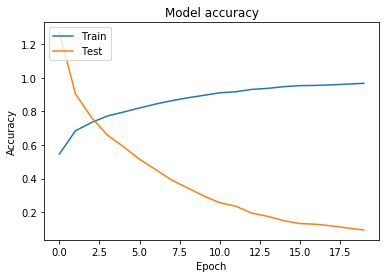

In [20]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
model2 = make_model(activation='swish')
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)
loss, accuracy = model2.evaluate(x_test, y_test)
print('Test:')
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/20
50000/50000 [==============================] - 17s 330us/step - loss: 1.2835 - accuracy: 0.5536
Epoch 2/20
50000/50000 [==============================] - 16s 316us/step - loss: 0.8793 - accuracy: 0.6940
Epoch 3/20
50000/50000 [==============================] - 16s 323us/step - loss: 0.6523 - accuracy: 0.7742
Epoch 4/20
50000/50000 [==============================] - 16s 323us/step - loss: 0.5274 - accuracy: 0.8163
Epoch 5/20
50000/50000 [==============================] - 16s 325us/step - loss: 0.4390 - accuracy: 0.8479
Epoch 6/20
50000/50000 [==============================] - 16s 327us/step - loss: 0.3718 - accuracy: 0.8719
Epoch 7/20
50000/50000 [==============================] - 16s 326us/step - loss: 0.3306 - accuracy: 0.8850
Epoch 8/20
50000/50000 [==============================] - 16s 327us/step - loss: 0.2871 - accuracy: 0.9003
Epoch 9/20
50000/50000 [==============================] - 16s 325us/step - loss: 0.2355 - accuracy: 0.9182
Epoch 10/20
50000/50000 [============

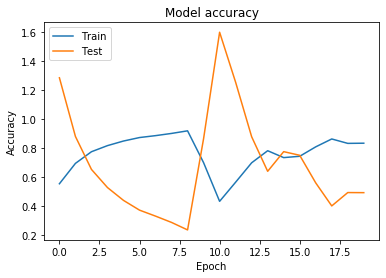

In [47]:
# 绘制训练 & 验证的准确率值
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
model3 = make_model(activation='custom')
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)
loss, accuracy = model3.evaluate(x_test, y_test)
print('Test:')
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/20
50000/50000 [==============================] - 21s 424us/step - loss: 1.2909 - accuracy: 0.5489
Epoch 2/20
50000/50000 [==============================] - 21s 411us/step - loss: 0.8894 - accuracy: 0.6934
Epoch 3/20
50000/50000 [==============================] - 21s 420us/step - loss: 0.6651 - accuracy: 0.7695
Epoch 4/20
50000/50000 [==============================] - 21s 421us/step - loss: 0.5277 - accuracy: 0.8173
Epoch 5/20
50000/50000 [==============================] - 21s 417us/step - loss: 0.4123 - accuracy: 0.8548
Epoch 6/20
50000/50000 [==============================] - 21s 423us/step - loss: 0.3190 - accuracy: 0.8878
Epoch 7/20
50000/50000 [==============================] - 21s 416us/step - loss: 0.2374 - accuracy: 0.9176
Epoch 8/20
50000/50000 [==============================] - 21s 414us/step - loss: 0.1996 - accuracy: 0.9301
Epoch 9/20
50000/50000 [==============================] - 21s 413us/step - loss: 0.1660 - accuracy: 0.9423
Epoch 10/20
50000/50000 [============

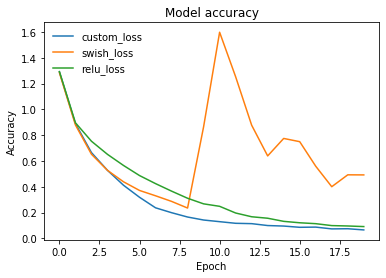

In [59]:
#plt.plot(history3.history['accuracy'],label="custom_accuracy")
plt.plot(history3.history['loss'],label="custom_loss")
#plt.plot(history2.history['accuracy'],label="swish")
plt.plot(history2.history['loss'],label="swish_loss")
#plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'],label="relu_loss")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(frameon=False, loc='upper left')
#plt.axis('equal')
plt.show()
#plt.savefig('loss.png')

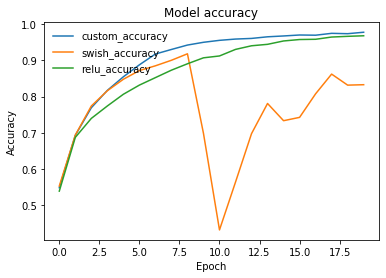

In [60]:
plt.plot(history3.history['accuracy'],label="custom_accuracy")
#plt.plot(history3.history['loss'],label="custom_loss")
plt.plot(history2.history['accuracy'],label="swish_accuracy")
#plt.plot(history2.history['loss'],label="swish_loss")
plt.plot(history.history['accuracy'],label="relu_accuracy")
#plt.plot(history.history['loss'],label="relu_loss")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(frameon=False, loc='upper left')
#plt.axis('equal')
plt.show()
#plt.savefig('accuracy.png')